## Prova 1 Multivariada
> Yhasmim tigre
> mat.: 20210026966

João Pessoa, Cabedelo, Santa Rita, Bayeux, Campina Grande,
Cajazeiras e Patos,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import os

In [ ]:
def preprocessamento(nome_arq, cidades):
  dados = pd.read_csv(nome_arq, sep=';',encoding = 'latin1', skiprows = 5, decimal=",", thousands=".")

  filtro_cidades = dados['Instituição'].apply(lambda x: any(cidade in x for cidade in cidades))
  filtro_iptu = dados['Conta'] == 'IPTU'
  filtro_final = dados[filtro_cidades & filtro_iptu][['Instituição', 'Conta', 'Valor']]

  nome_df = os.path.splitext(os.path.basename(nome_arq))[0]
  df_filtrado = pd.DataFrame(filtro_final)

  soma_por_cidade = filtro_final.groupby('Instituição')['Valor'].sum().reset_index()
  soma_por_cidade = soma_por_cidade.rename(columns={'Valor': f'Valor_{nome_df}'})


  """print(f"DataFrame do ano: {nome_df}")
  print(df_filtrado)
  print(f"Dataframe com apenas a soma de IPTU arrecadado por cidade: ")
  print(soma_por_cidade)"""

  '''
  print(df_filtrado.info())
  '''

  return soma_por_cidade

In [ ]:
def unir_arquivos(lista_arq, cidades):
    df_final = pd.DataFrame()

    for arq in lista_arq:
        df_soma = preprocessamento(arq, cidades)

        if df_final.empty:
            df_final = df_soma
        else:
            # Junta os dataframes pelo nome da cidade ("Instituição")
            df_final = pd.merge(df_final, df_soma, on='Instituição', how='outer')

    return df_final

In [ ]:
cidades = ['João Pessoa', 'Cabedelo', 'Santa Rita', 'Bayeux', 'Campina Grande', 'Cajazeiras', 'Patos']
arquivos_csv = ['2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv', '2023.csv']
resultado_final = unir_arquivos(arquivos_csv, cidades)

print(resultado_final)

                                   Instituição    Valor_2017    Valor_2018  \
0          Prefeitura Municipal de Bayeux - PB  4.231974e+06  5.937235e+06   
1        Prefeitura Municipal de Cabedelo - PB  2.128110e+07  1.666740e+07   
2      Prefeitura Municipal de Cajazeiras - PB  3.195168e+06  3.762175e+06   
3  Prefeitura Municipal de Campina Grande - PB  5.084600e+07  6.833560e+07   
4     Prefeitura Municipal de João Pessoa - PB  1.969528e+08  2.471163e+08   
5           Prefeitura Municipal de Patos - PB  5.298901e+06  4.914752e+06   
6      Prefeitura Municipal de Santa Rita - PB  1.610332e+06  6.336346e+06   

     Valor_2019    Valor_2020    Valor_2021    Valor_2022    Valor_2023  
0  5.971603e+06  5.861701e+06  3.632534e+06  6.161255e+06  4.366782e+06  
1  1.836494e+07  2.092504e+07  2.437887e+07  3.449906e+07  4.880372e+07  
2  4.512434e+06  3.982742e+06  9.552562e+06  2.190389e+07  2.339135e+07  
3  7.239590e+07  8.317931e+07  9.547740e+07  1.200350e+08  1.476512e+08  
4  2.

In [ ]:
def percentual(df):
    colunas_valor = sorted([col for col in df.columns if col.startswith('Valor_')])

    crescimento_df = pd.DataFrame()

    for i, row in df.iterrows():
        cidade = row['Instituição']
        crescimento = []
        for j in range(1, len(colunas_valor)):
            ano_anterior = colunas_valor[j - 1]
            ano_atual = colunas_valor[j]

            # crescimento percentual
            if row[ano_anterior] > 0:
                percentual = ((row[ano_atual] - row[ano_anterior]) / row[ano_anterior]) * 100
            else:
                percentual = 0  #evita divisão por zero

            crescimento.append(percentual)
        crescimento_df[cidade] = crescimento
    crescimento_df.index = [col[-4:] for col in colunas_valor[1:]]

    return crescimento_df

def gerar_histogramas(crescimento_df):

    for cidade in crescimento_df.columns:
        plt.figure(figsize=(9, 5))
        plt.bar(crescimento_df.index, crescimento_df[cidade], color='skyblue')
        plt.title(f'Crescimento Percentual por Ano - {cidade}')
        plt.xlabel('Ano')
        plt.ylabel('Crescimento Percentual (%)')
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


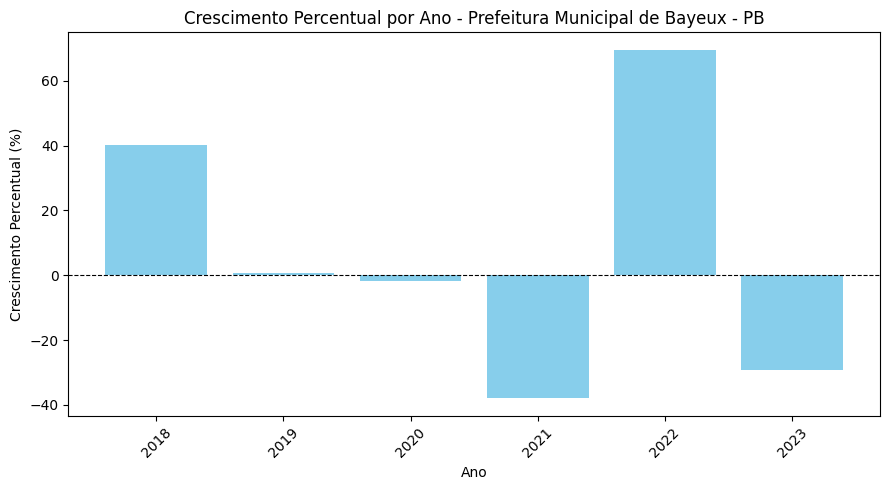

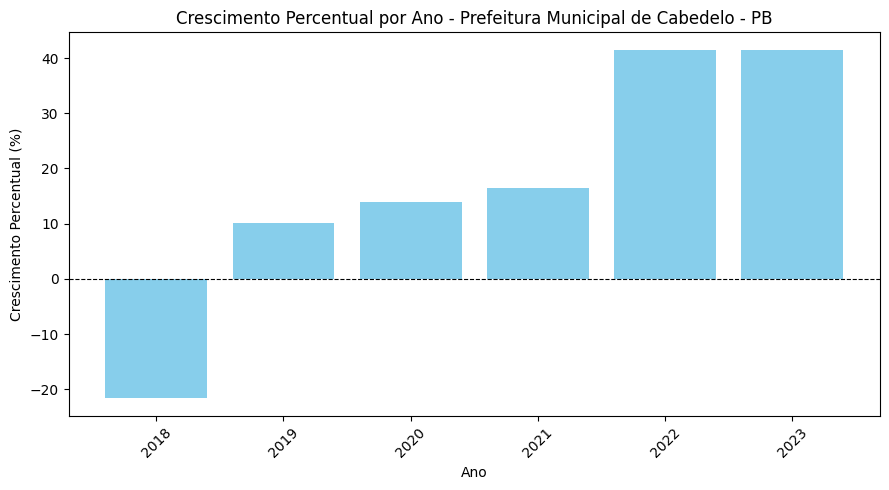

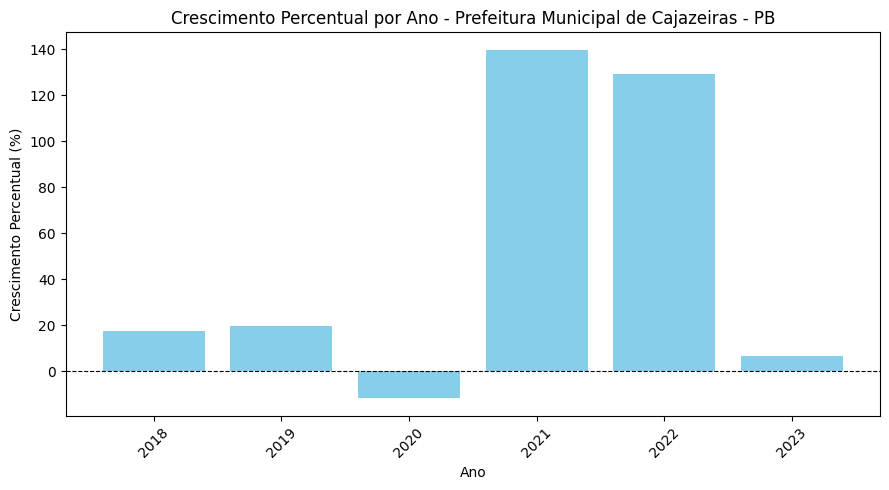

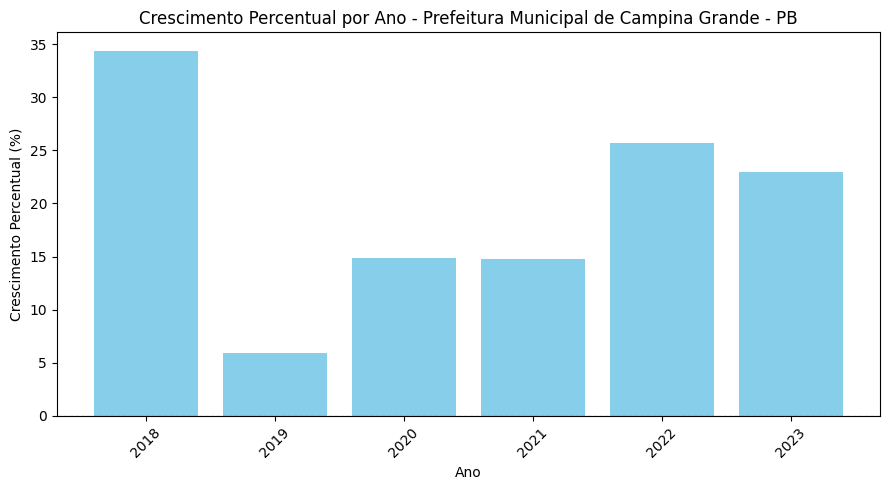

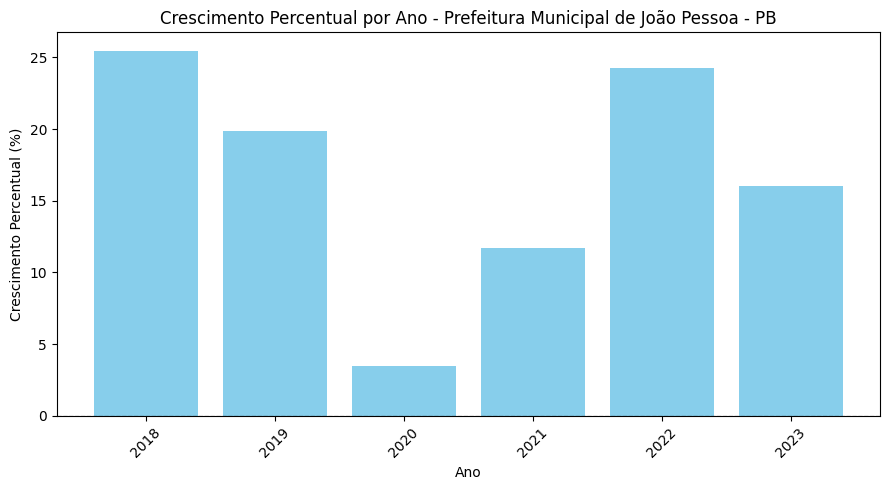

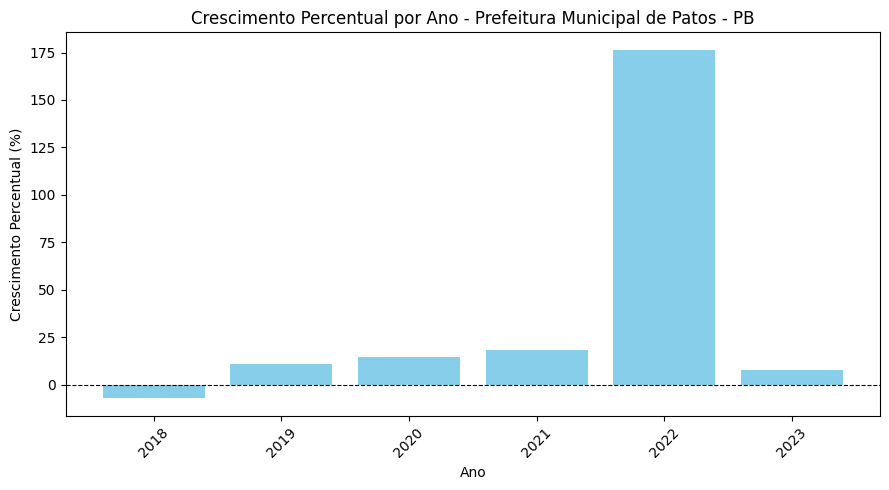

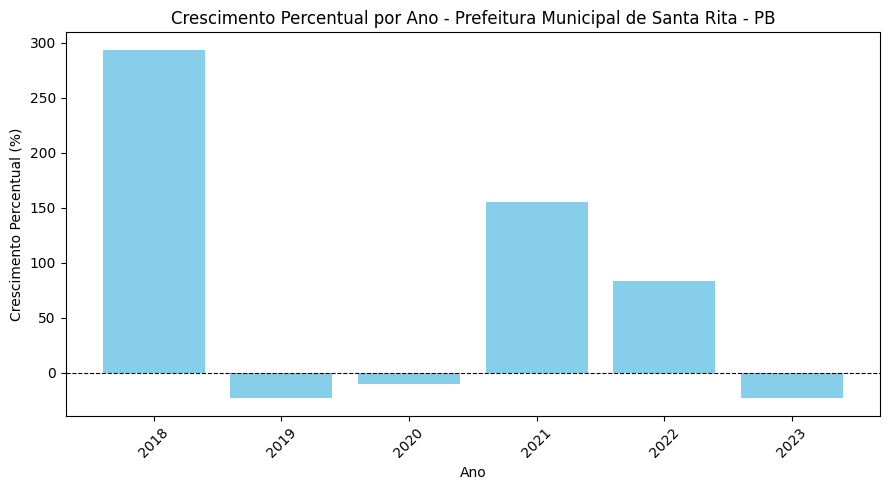

In [ ]:
cidades = ['João Pessoa', 'Cabedelo', 'Santa Rita', 'Bayeux', 'Campina Grande', 'Cajazeiras', 'Patos']
crescimento_df = percentual(resultado_final)
gerar_histogramas(crescimento_df)

In [ ]:
cidade = ["Conde"]
resultado_final_conde = unir_arquivos(arquivos_csv, cidade)
print(resultado_final_conde)

                          Instituição  Valor_2017  Valor_2018   Valor_2019  \
0  Prefeitura Municipal de Conde - PB  7872698.86  9484608.56  10908754.12   

   Valor_2020  Valor_2021   Valor_2022   Valor_2023  
0  9815800.38  12551970.0  17305228.86  23168828.38  


In [ ]:
def clusterizacao_top_down(df, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    df['Cluster_Top_Down'] = kmeans.fit_predict(df.select_dtypes(include='number'))
    return df

def clusterizacao_bottom_up(df):
    Z = linkage(df.select_dtypes(include='number'), method='ward')

    plt.figure(figsize=(9, 5))
    dendrogram(Z, labels=df.index)
    plt.title('Dendrograma - Clusterização Bottom-Up')
    plt.xlabel('Cidades')
    plt.ylabel('Distância Euclidiana')
    plt.show()

    return Z


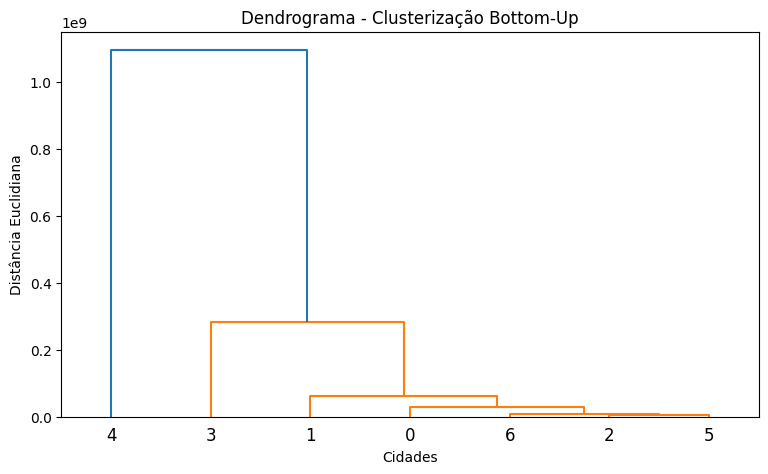

--------------------------------------------------------------
                                   Instituição    Valor_2017    Valor_2018  \
0          Prefeitura Municipal de Bayeux - PB  4.231974e+06  5.937235e+06   
1        Prefeitura Municipal de Cabedelo - PB  2.128110e+07  1.666740e+07   
2      Prefeitura Municipal de Cajazeiras - PB  3.195168e+06  3.762175e+06   
3  Prefeitura Municipal de Campina Grande - PB  5.084600e+07  6.833560e+07   
4     Prefeitura Municipal de João Pessoa - PB  1.969528e+08  2.471163e+08   
5           Prefeitura Municipal de Patos - PB  5.298901e+06  4.914752e+06   
6      Prefeitura Municipal de Santa Rita - PB  1.610332e+06  6.336346e+06   

     Valor_2019    Valor_2020    Valor_2021    Valor_2022    Valor_2023  \
0  5.971603e+06  5.861701e+06  3.632534e+06  6.161255e+06  4.366782e+06   
1  1.836494e+07  2.092504e+07  2.437887e+07  3.449906e+07  4.880372e+07   
2  4.512434e+06  3.982742e+06  9.552562e+06  2.190389e+07  2.339135e+07   
3  7.239590e

In [ ]:
top_down = clusterizacao_top_down(resultado_final)
bottom_up = clusterizacao_bottom_up(resultado_final)

print("--------------------------------------------------------------")
print(top_down)
print("--------------------------------------------------------------")
print(bottom_up)

In [ ]:
def classificar_conde(df, grupo_1, grupo_2, serie_conde):
    colunas_valor = [col for col in serie_conde.columns if col.startswith('Valor_')]
    serie_conde_values = serie_conde[colunas_valor].values.flatten()

    #média das distâncias para o grupo 1
    distancias_grupo_1 = []
    for cidade in grupo_1.index:
        serie_cidade = grupo_1.loc[cidade, colunas_valor].values
        distancia = np.abs(serie_conde_values - serie_cidade).mean()
        distancias_grupo_1.append(distancia)

    media_distancia_grupo_1 = np.mean(distancias_grupo_1)

    # média das distâncias para o grupo 2
    distancias_grupo_2 = []
    for cidade in grupo_2.index:
        serie_cidade = grupo_2.loc[cidade, colunas_valor].values
        distancia = np.abs(serie_conde_values - serie_cidade).mean()
        distancias_grupo_2.append(distancia)

    media_distancia_grupo_2 = np.mean(distancias_grupo_2)

    # Classificação do Conde
    if media_distancia_grupo_1 < media_distancia_grupo_2:
        grupo_conde = 1
    else:
        grupo_conde = 2

    return grupo_conde, media_distancia_grupo_1, media_distancia_grupo_2

In [ ]:
clusterizacao_top_down_result = clusterizacao_top_down(resultado_final)
grupo_1 = clusterizacao_top_down_result[clusterizacao_top_down_result['Cluster_Top_Down'] == 0]
grupo_2 = clusterizacao_top_down_result[clusterizacao_top_down_result['Cluster_Top_Down'] == 1]

grupo_conde, media_1, media_2 = classificar_conde(resultado_final, grupo_1, grupo_2, resultado_final_conde)

print(f"A cidade do Conde foi classificada no grupo {grupo_conde}.")
print(f"Média da distância para o Grupo 1: {media_1:.2f}")
print(f"Média da distância para o Grupo 2: {media_2:.2f}")

A cidade do Conde foi classificada no grupo 1.
Média da distância para o Grupo 1: 18679741.34
Média da distância para o Grupo 2: 316703702.69


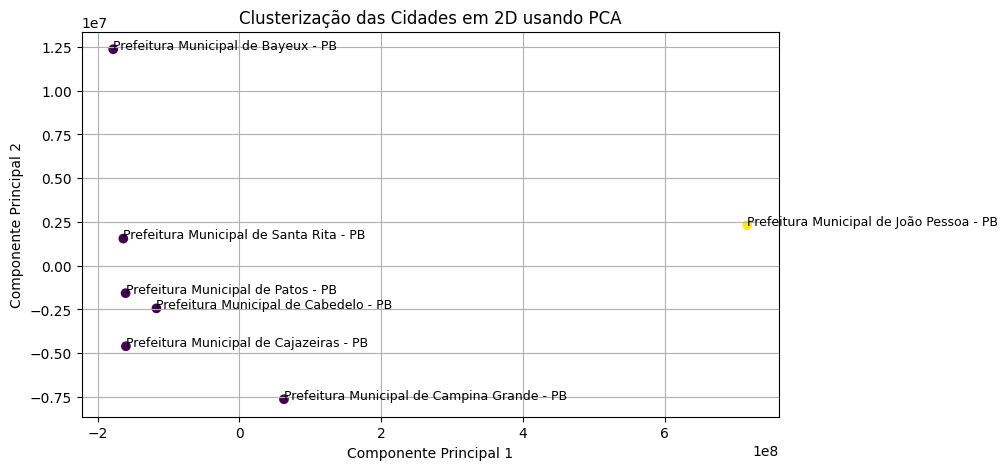

A cidade do Conde foi classificada no Grupo: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA

colunas_valor = [col for col in cidades.columns if 'Valor' in col]

# PCA
pca = PCA(n_components=2)
valores_pca = pca.fit_transform(cidades[colunas_valor])

#k-médias para clusterização
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
cidades['Cluster'] = kmeans.fit_predict(valores_pca)

#componentes principais
cidades['PCA1'] = valores_pca[:, 0]
cidades['PCA2'] = valores_pca[:, 1]

plt.figure(figsize=(9, 5))
plt.scatter(cidades['PCA1'], cidades['PCA2'], c=cidades['Cluster'], cmap='viridis', marker='o')
plt.title('Clusterização das Cidades em 2D usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
for i, cidade in enumerate(cidades['Instituição']):
    plt.annotate(cidade, (cidades['PCA1'].iloc[i], cidades['PCA2'].iloc[i]), fontsize=9)

plt.grid()
plt.show()

# Classificar a série do Conde
col_valor = [col for col in resultado_final_conde.columns if 'Valor' in col]
serie_conde_values = resultado_final_conde[col_valor].values.flatten()
serie_conde_pca = pca.transform([serie_conde_values])

#distância para cada centro de cluster
centros = kmeans.cluster_centers_
distancias = np.linalg.norm(centros - serie_conde_pca, axis=1)

# classifica Conde no grupo com a menor distância
grupo_conde = np.argmin(distancias)
print(f'A cidade do Conde foi classificada no Grupo: {grupo_conde}')